Metadados para análise - de acordo com o filtro Identificação da plataforma BTB

Sumário:

*   Data de nascimento, com média de idade da equipe - feito
*   Posição
*   minutagem de jogo, com média por temporada
*   Nota por jogo, com média por temporada
*   Ações boas
*   Ações ruins
*   Gols, com média de gols por jogo na temporada
*   Assistências, com média por jogo na temporada

Informações:


*   Palette escolhida para a aplicação: 'YlGnBu'











##Importação dos pacotes e bancos de dados necessários

In [ ]:
#importação dos pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# importação do banco de dados em csv, colocando a primeira coluna como índice e alteração de quaisquer colunas para float se necessário

palmeiras = pd.read_csv('/content/protocolo box tool box - para testes - Atletas de Linha.csv', index_col = 0) #importação da tabela
palmeiras['Nota'] = palmeiras['Nota'].str.replace(',', '.').astype(float) #transformação da coluna em float

In [ ]:
palmeiras.head()

,Nome do Atleta,Data de Nascimento,Equipe,Posição,Minutos,Nota,Ações,Ações boas,Ações ruins,Gols,...,Perda da posse dentro da área defensiva,Decisão pelo drible claramente errada em jogada para situação de gol,Contra-ataque oferecido,Posse recuperada no último quarto,Impede situação clara de gol,Ação que gera erro do adversário,Adversário conecta ocasião de gol após perder disputa de bola,Adversário marca gol após perder disputa de bola,GOL CONTRA,Jogos
numeração,,,,,,,,,,,,,,,,,,,,,
4,Talisca,3/20/2003,Palmeiras-SP,Zagueiro Direito,96,7.12,62,53,9,1.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1
5,Léo,3/14/2004,Palmeiras-SP,Volante,78,7.13,46,38,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,Ian,4/16/2003,Palmeiras-SP,Meia Ala Esquerda,96,7.09,57,46,11,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
7,Kauan Santos,6/17/2004,Palmeiras-SP,Meia Esquerda,78,7.11,45,26,19,NaN,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
8,Patrick,3/19/2004,Palmeiras-SP,2º Volante,63,6.63,33,24,9,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1


##1) Filtros de data de Nascimento, com média de idade por equipe

In [ ]:
#alterar a data de nascimento para datetime
palmeiras['Data de Nascimento'] = pd.to_datetime(palmeiras['Data de Nascimento'])

In [ ]:
#Criar dataframe e visualização do filtro data de nascimento:
data_nasc = palmeiras.loc[:, ['Nome do Atleta', 'Data de Nascimento']]

# Criar uma cópia para não modificar o original
data_nasc_form = data_nasc.copy()
data_nasc_form['Data de Nascimento'] = data_nasc_form['Data de Nascimento'].dt.strftime('%d/%m/%Y') # aplicar a formatação de data desejada
data_nasc_form

,Nome do Atleta,Data de Nascimento
numeração,,
4,Talisca,20/03/2003
5,Léo,14/03/2004
6,Ian,16/04/2003
7,Kauan Santos,17/06/2004
8,Patrick,19/03/2004
9,Thalys,22/02/2005
10,Estevão,24/04/2007
12,Gilberto,27/03/2005
13,Vitor Reis,12/01/2006


In [ ]:
# filtrar e agrupar por ano de nascimento

data_nasc['ano_nascimento'] = data_nasc['Data de Nascimento'].dt.year # cria a coluna só com o ano
ano_nasc_agrup = data_nasc.groupby('ano_nascimento').size()
ano_nasc_agrup

ano_nascimento
2003    2
2004    6
2005    4
2006    2
2007    1
2008    1
dtype: int64

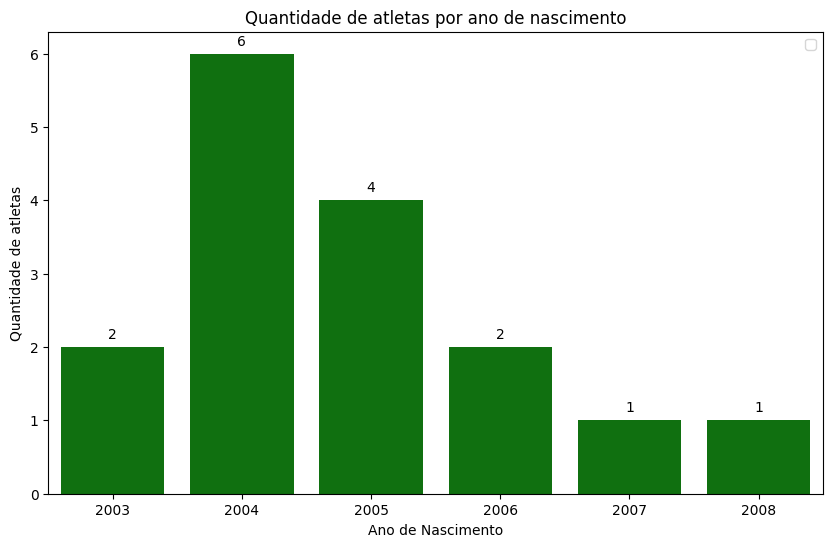

In [ ]:
#teste plotagem

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ano_nasc_agrup.index, y=ano_nasc_agrup.values, color='green')
for p in ax.patches:
     ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xticks(rotation=0)
plt.title('Quantidade de atletas por ano de nascimento')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Quantidade de atletas')
plt.legend()
plt.show()

In [ ]:
data_nasc['idade'] = (pd.to_datetime('today') - data_nasc['Data de Nascimento']).dt.days // 365

media_idade = data_nasc['idade'].mean().round(1)
print('A média de idade dos jogadores é de ' + str(media_idade) + ' anos')

A média de idade dos jogadores é de 18.9 anos


##2) Filtros de posição

In [ ]:
#criação da tabela
filtro_posic = palmeiras.loc[:, ['Nome do Atleta', 'Posição']]
filtro_posic

,Nome do Atleta,Posição
numeração,,
4,Talisca,Zagueiro Direito
5,Léo,Volante
6,Ian,Meia Ala Esquerda
7,Kauan Santos,Meia Esquerda
8,Patrick,2º Volante
9,Thalys,Atacante
10,Estevão,Meia Ofensivo
12,Gilberto,Lateral Direito
13,Vitor Reis,Zagueiro Esquerdo


In [ ]:
#contagem de jogadores por posição
contagem_posic = filtro_posic['Posição'].value_counts()
contagem_posic

Posição
Volante              2
Atacante             2
Meia Ofensivo        2
Lateral Direito      2
Lateral Esquerdo     2
Zagueiro Direito     1
Meia Ala Esquerda    1
Meia Esquerda        1
2º Volante           1
Zagueiro Esquerdo    1
Ponta Direita        1
Name: count, dtype: int64

##3) Filtro de minutagem com média por temporada

In [ ]:
filtro_minut = palmeiras.loc[:, ['Nome do Atleta', 'Minutos']].sort_values(by='Minutos', ascending=False)
filtro_minut

,Nome do Atleta,Minutos
numeração,,
4,Talisca,96
6,Ian,96
9,Thalys,96
13,Vitor Reis,96
12,Gilberto,86
5,Léo,78
7,Kauan Santos,78
10,Estevão,78
8,Patrick,63


In [ ]:
media_minut = filtro_minut['Minutos'].mean().round(0)
print('A média de minutos jogados é de ' + str(media_minut) + ' minutos')

A média de minutos jogados é de 60.0 minutos


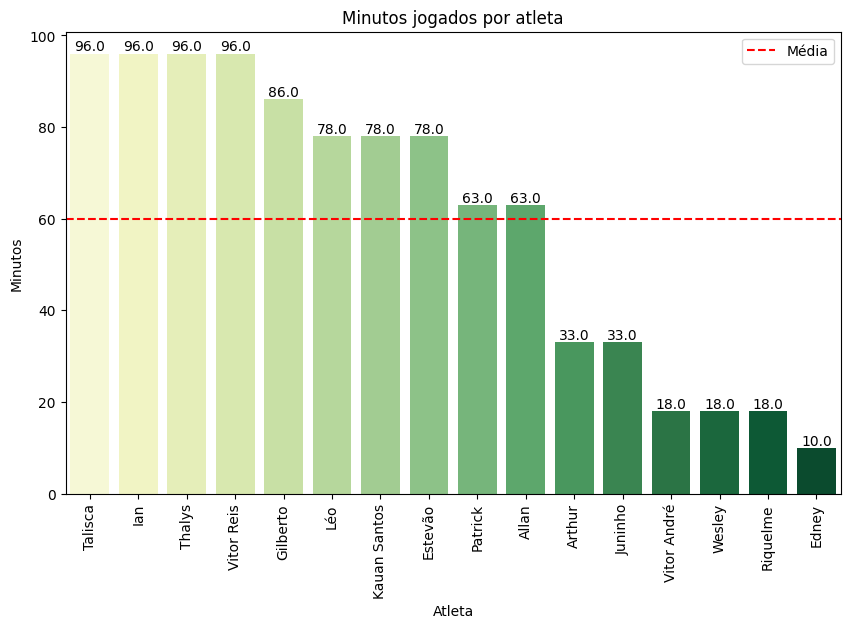

In [ ]:
#gráfico de barras
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='Nome do Atleta', y='Minutos', hue='Nome do Atleta', data=filtro_minut, palette='YlGn', legend=False)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.legend()
plt.xticks(rotation=90)
plt.title('Minutos jogados por atleta')
plt.xlabel('Atleta')
plt.ylabel('Minutos')
bar.axhline(media_minut, color='red', linestyle='--', label='Média')
plt.legend()
plt.show()


##4) Nota por jogo com média da temporada




In [ ]:
#criar o filtro
filtro_nota = palmeiras.loc[:, ['Nome do Atleta', 'Nota']].sort_values(by='Nota', ascending=False)
filtro_nota

,Nome do Atleta,Nota
numeração,,
10,Estevão,8.78
12,Gilberto,8.25
20,Allan,8.20
9,Thalys,7.21
5,Léo,7.13
4,Talisca,7.12
13,Vitor Reis,7.12
7,Kauan Santos,7.11
6,Ian,7.09


In [ ]:
#média por jogo
media_nota = filtro_nota['Nota'].mean().round(1)
print('A média de nota por jogo é de ' + str(media_nota))

A média de nota por jogo é de 7.1


In [ ]:
#média jogador x temporada

##5) Ações Boas por jogador

In [ ]:
filtro_boas = palmeiras.loc[:, ['Nome do Atleta', 'Ações boas']].sort_values(by='Ações boas', ascending=False)
filtro_boas

,Nome do Atleta,Ações boas
numeração,,
13,Vitor Reis,79
4,Talisca,53
12,Gilberto,52
6,Ian,46
10,Estevão,44
5,Léo,38
20,Allan,34
7,Kauan Santos,26
8,Patrick,24


In [ ]:
#adicionando coluna de porcentagem por jogador
filtro_boas['Porcentagem'] = ((filtro_boas['Ações boas'] / filtro_boas['Ações boas'].sum()) * 100).round(0)
filtro_boas

,Nome do Atleta,Ações boas,Porcentagem
numeração,,,
13,Vitor Reis,79,17.0
4,Talisca,53,11.0
12,Gilberto,52,11.0
6,Ian,46,10.0
10,Estevão,44,9.0
5,Léo,38,8.0
20,Allan,34,7.0
7,Kauan Santos,26,6.0
8,Patrick,24,5.0


In [ ]:
#soma e média de ações boas por jogo
boas_soma = filtro_boas['Ações boas'].sum()
boas_media = filtro_boas['Ações boas'].mean().round(1)

print('A soma de ações boas por jogo é de ' + str(boas_soma) + ' ações')
print('A média de ações boas por jogo é de ' + str(boas_media) + ' ações')

A soma de ações boas por jogo é de 466 ações
A média de ações boas por jogo é de 29.1 ações


Text(0.5, 1.0, 'Ações Boas por Atleta')

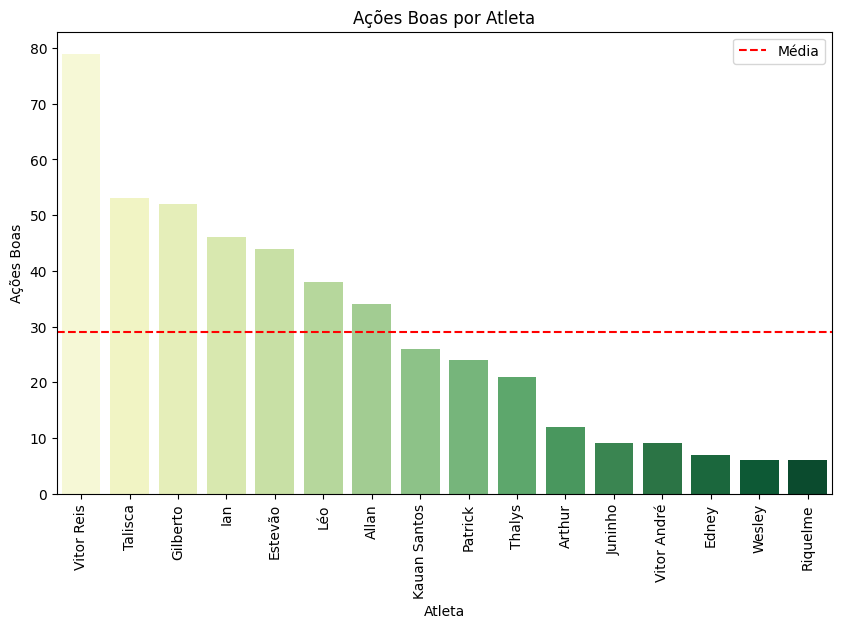

In [ ]:
#gráfico de barras com linha de média

plt.figure(figsize=(10, 6))
bar = sns.barplot(x='Nome do Atleta', y='Ações boas', hue='Nome do Atleta', data=filtro_boas, palette='YlGn', legend=False)
plt.title('Ações boas por atleta')
plt.xlabel('Atleta')
plt.ylabel('Ações Boas')
bar.axhline(boas_media, color='red', linestyle='--', label='Média')
plt.legend()
plt.xticks(rotation=90)
plt.title('Ações Boas por Atleta')

##6) Ações Ruins por jogador

In [ ]:
filtro_ruins = palmeiras.loc[:, ['Nome do Atleta', 'Ações ruins']].sort_values(by='Ações ruins', ascending=False)

#adicionando a coluna porcentagem
filtro_ruins['Porcentagem'] = ((filtro_ruins['Ações ruins'] / filtro_ruins['Ações ruins'].sum()) * 100).round(0)
filtro_ruins

,Nome do Atleta,Ações ruins,Porcentagem
numeração,,,
7,Kauan Santos,19,13.0
10,Estevão,18,12.0
12,Gilberto,17,12.0
9,Thalys,12,8.0
6,Ian,11,8.0
20,Allan,11,8.0
4,Talisca,9,6.0
8,Patrick,9,6.0
16,Arthur,9,6.0


In [ ]:
#média e soma
ruins_soma = filtro_ruins['Ações ruins'].sum()
ruins_media = filtro_ruins['Ações ruins'].mean().round(1)

print('A soma de ações ruins por jogo é de ' + str(ruins_soma) + ' ações')
print('A média de ações ruins por jogo é de ' + str(ruins_media) + ' ações')

A soma de ações ruins por jogo é de 145 ações
A média de ações ruins por jogo é de 9.1 ações


Text(0.5, 1.0, 'Ações Ruins por Atleta')

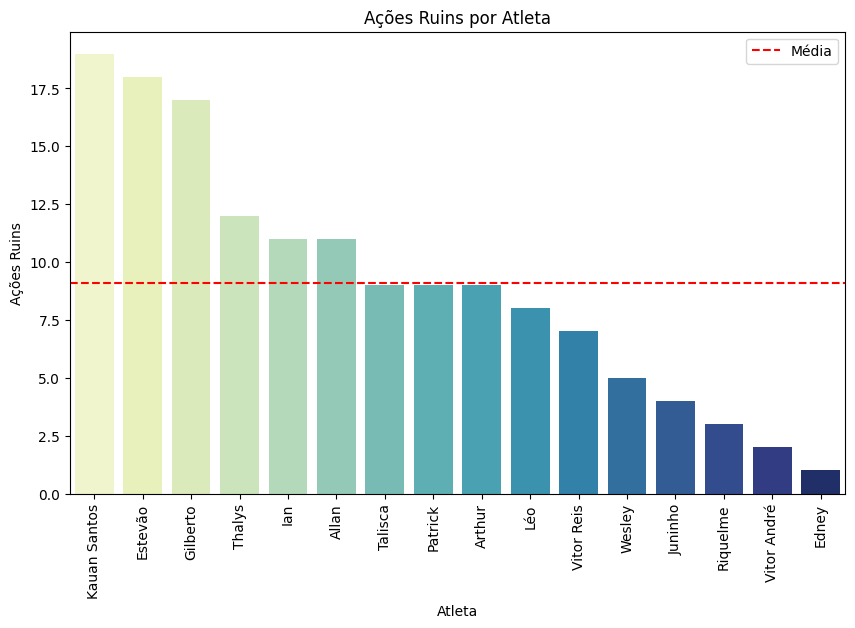

In [ ]:
#gráfico de barras
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='Nome do Atleta', y='Ações ruins', hue='Nome do Atleta', data=filtro_ruins, palette='YlGnBu', legend=False)
plt.xlabel('Atleta')
plt.ylabel('Ações Ruins')
bar.axhline(ruins_media, color='red', linestyle='--', label='Média')
plt.legend()
plt.xticks(rotation=90)
plt.title('Ações Ruins por Atleta')

In [ ]:


# montando gráfico interativo em pyplot
fig = px.bar(filtro_ruins, x='Nome do Atleta', y='Ações ruins', color='Ações ruins', color_continuous_scale='YlGnBu', hover_data='Ações ruins', hover_name='Nome do Atleta')
#adicionando a linha de média
fig.add_hline(y=ruins_media, line_dash='dash', line_color='red', line_width=2, annotation_text='Média')
fig.update_layout(title='Ações Ruins por Atleta', xaxis_title='Atleta', yaxis_title='Ações Ruins')
fig.show()

##7) Filtro e métricas de gols por jogo e por temporada

In [ ]:
filtro_gols = palmeiras.loc[:, ['Nome do Atleta', 'Gols']].fillna(0).sort_values(by='Gols', ascending=False)

#adicionando a coluna porcentagem
filtro_gols['Porcentagem'] = ((filtro_gols['Gols'] / filtro_gols['Gols'].sum()) * 100).round(0)
filtro_gols

,Nome do Atleta,Gols,Porcentagem
numeração,,,
10,Estevão,2.0,29.0
4,Talisca,1.0,14.0
12,Gilberto,1.0,14.0
20,Allan,1.0,14.0
15,Vitor André,1.0,14.0
17,Riquelme,1.0,14.0
5,Léo,0.0,0.0
6,Ian,0.0,0.0
7,Kauan Santos,0.0,0.0


In [ ]:
#soma jogo

gols_soma = filtro_gols['Gols'].sum()
print('A soma de gols por jogo é de ' + str(gols_soma) + ' gols')


A soma de gols por jogo é de 7.0 gols


In [ ]:
#média de gols na temporada

In [ ]:
#média de gols por jogador na temporada

##8) Filtro Assistências

In [ ]:
filtro_assist = palmeiras.loc[:, ['Nome do Atleta', 'Assistências']].fillna(0).sort_values(by='Assistências', ascending=False)

#incluir a coluna porcentagens
filtro_assist['Porcentagem'] = ((filtro_assist['Assistências'] / filtro_assist['Assistências'].sum()) * 100).round(0)
filtro_assist



,Nome do Atleta,Assistências,Porcentagem
numeração,,,
6,Ian,1.0,50.0
7,Kauan Santos,1.0,50.0
4,Talisca,0.0,0.0
5,Léo,0.0,0.0
8,Patrick,0.0,0.0
9,Thalys,0.0,0.0
10,Estevão,0.0,0.0
12,Gilberto,0.0,0.0
13,Vitor Reis,0.0,0.0


In [ ]:
#soma
assist_soma = filtro_assist['Assistências'].sum()

print('A soma de assistências por jogo é de ' + str(assist_soma) + ' assistências')

A soma de assistências por jogo é de 2.0 assistências


In [ ]:
#média de assistências da equipe por temporada

In [ ]:
#média de assistências do atleta por temporada

## Testes de Plotagem em plotly

In [ ]:
from plotly.subplots import make_subplots

#Ações boas x Assistências
fig= make_subplots(rows=2, cols=1, subplot_titles=("Ações Boas", "Assistências"))
fig.add_trace(go.Bar(x=filtro_boas['Nome do Atleta'], y=filtro_boas['Ações boas'], name='Ações Boas por jogador'), row=1, col=1)
fig.add_trace(go.Bar(x=filtro_assist['Nome do Atleta'], y=filtro_assist['Assistências'], name='Assistências por jogador'), row=2, col=1)
fig.update_layout({'title': {'text': 'Ações Boas x Assistências', 'x': 0.5, 'y': 0.9}})
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=filtro_boas['Nome do Atleta'], y=filtro_boas['Ações boas'], name='Ações Boas'))
fig.add_trace(go.Bar(x=filtro_assist['Nome do Atleta'], y=filtro_assist['Assistências'], name='Assistências'))
fig.update_layout(barmode='group')
fig.update_layout(title='Ações Boas x Assistências', xaxis_title='Atleta', yaxis_title='Ações Boas')

fig.show()

## Transformação em relatório pdf